# Pre-procesamiento

El preprocesamiento de datos es el primer paso crucial en el desarrollo de un modelo de Machine Learning. Mejora la calidad de los datos y ayuda a obtener resultados más precisos y confiables.

### Limpieza de Datos
El proceso de detectar y corregir (o eliminar) errores e inconsistencias en los datos.

In [29]:
import pandas as pd

In [30]:
titanic_path = "../data/titanic.csv"
data = pd.read_csv(titanic_path, index_col='PassengerId')

# Mostrar las primeras filas del dataset
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
# Revisar si hay duplicados
data.duplicated().sum()

20

In [32]:
# Mostrar duplicados
data[data.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
907,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
908,0,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.3500,NaN,Q
909,0,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
910,1,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S
911,1,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
913,0,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S
914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
915,0,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C


In [33]:
# Eliminar duplicados
data = data.drop_duplicates()

# Mostrar información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


**Manejo de Valores Faltantes**

Métodos Comunes:
- Eliminación de filas/columnas con valores faltantes.
- Imputación (relleno) con la media, mediana o moda.
- Uso de modelos predictivos para imputar valores.

In [34]:
# Mostrar el número de valores faltantes por columna
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [35]:
# Eliminar filas con valores faltantes
data = data.dropna()

## Tratamiento de datos faltantes

<img src="../imgs/distribution.webp">

<img src="../imgs/impute.png">

In [36]:
import matplotlib.pyplot as plt

<Axes: >

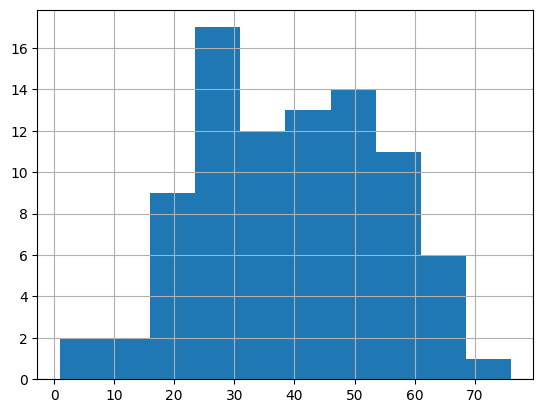

In [37]:
# Ver distribución de la edad
data['Age'].hist()

In [38]:
# Imputar valores faltantes en la columna 'Age' con la media
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Imputar valores faltantes en la columna 'Fare' con la mediana
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [39]:
# Imputar valores faltantes en la columna 'Embarked' con la moda
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Imputar valores faltantes en la columna 'Cabin' con 'Unknown'
data['Cabin'] = data['Cabin'].fillna('Desconocido')

In [40]:
# Mostrar información del dataset después de la imputación
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 904 to 1306
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  87 non-null     int64  
 1   Pclass    87 non-null     int64  
 2   Name      87 non-null     object 
 3   Sex       87 non-null     object 
 4   Age       87 non-null     float64
 5   SibSp     87 non-null     int64  
 6   Parch     87 non-null     int64  
 7   Ticket    87 non-null     object 
 8   Fare      87 non-null     float64
 9   Cabin     87 non-null     object 
 10  Embarked  87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB


**Codificación de datos categóricos**

Transformar datos categóricos en un formato que puede ser proporcionado a los algoritmos de Machine Learning.

Métodos Comunes:
- One-Hot Encoding.
- Label Encoding.

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Codificación de la columna 'Sex' utilizando Label Encoding
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [42]:
# Codificación de la columna 'Embarked' utilizando One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
embarked_encoded = onehot_encoder.fit_transform(data[['Embarked']])

# Convertir el array resultante a un DataFrame
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=onehot_encoder.get_feature_names_out(['Embarked']))

# Concatenar las columnas codificadas con el dataset original
data = pd.concat([data, embarked_encoded_df], axis=1)

# Eliminar la columna original 'Embarked'
data = data.drop('Embarked', axis=1)

In [43]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
904,1.0,1.0,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0.0,23.0,1.0,0.0,21228,82.2667,B45,NaN,NaN,NaN
906,1.0,1.0,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0.0,47.0,1.0,0.0,W.E.P. 5734,61.1750,E31,NaN,NaN,NaN
916,1.0,1.0,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0.0,48.0,1.0,3.0,PC 17608,262.3750,B57 B59 B63 B66,NaN,NaN,NaN
918,1.0,1.0,"Ostby, Miss. Helene Ragnhild",0.0,22.0,0.0,1.0,113509,61.9792,B36,NaN,NaN,NaN
920,0.0,1.0,"Brady, Mr. John Bertram",1.0,41.0,0.0,0.0,113054,30.5000,A21,NaN,NaN,NaN


In [44]:
# Codificación de la columna 'Pclass' utilizando One-Hot Encoding
pclass_encoded = onehot_encoder.fit_transform(data[['Pclass']])
pclass_encoded_df = pd.DataFrame(pclass_encoded, columns=onehot_encoder.get_feature_names_out(['Pclass']))
data = pd.concat([data, pclass_encoded_df], axis=1)
data = data.drop('Pclass', axis=1)

In [45]:
# Mostrar las primeras filas del dataset después de la codificación
data.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1.0,Pclass_2.0,Pclass_3.0,Pclass_nan
904,1.0,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0.0,23.0,1.0,0.0,21228,82.2667,B45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,1.0,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0.0,47.0,1.0,0.0,W.E.P. 5734,61.1750,E31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916,1.0,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0.0,48.0,1.0,3.0,PC 17608,262.3750,B57 B59 B63 B66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
918,1.0,"Ostby, Miss. Helene Ragnhild",0.0,22.0,0.0,1.0,113509,61.9792,B36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,0.0,"Brady, Mr. John Bertram",1.0,41.0,0.0,0.0,113054,30.5000,A21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Escalado de Características**

Normalización:

Ajustar los valores en una escala de 0 a 1.

Fórmula: 
$$ x' = \frac{x - \min(x)}{\max(x) - \min(x)} $$
​
 
Estandarización:

Ajustar los valores para que tengan una media de 0 y una desviación estándar de 1.

Fórmula: 
$$ z = \frac{x - \mu}{\sigma} $$


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

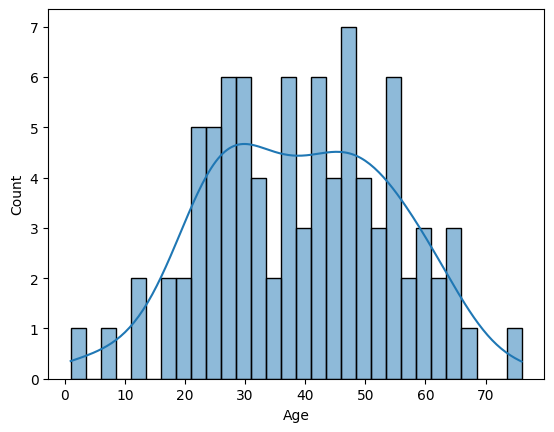

In [47]:
# Mostrar la distribución de la columna 'Age'
sns.histplot(data['Age'], bins=30, kde=True);

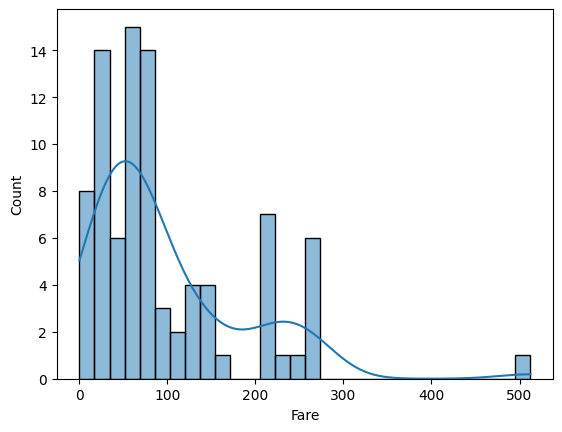

In [48]:
sns.histplot(data['Fare'], bins=30, kde=True);

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar las características numéricas
numeric_features = ['Age', 'Fare']

In [50]:
data[numeric_features].describe()

,Age,Fare
count,87.000000,87.000000
mean,39.247126,98.109198
std,15.218730,88.177319
min,1.000000,0.000000
25%,27.000000,35.339600
50%,39.000000,71.283300
75%,50.000000,135.066650
max,76.000000,512.329200


In [51]:
# Normalización
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

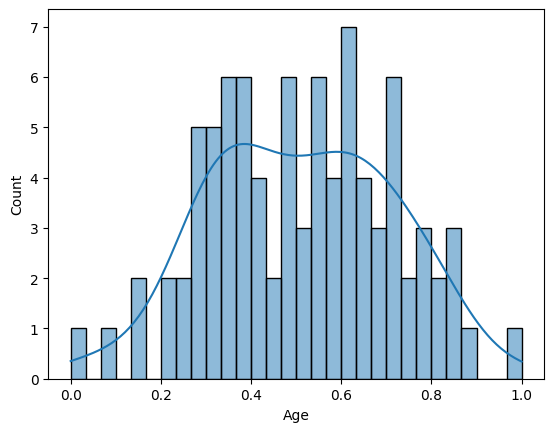

In [52]:
sns.histplot(data['Age'], bins=30, kde=True);

In [53]:
# Estandarización
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Mostrar las primeras filas del dataset después del escalado
data.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1.0,Pclass_2.0,Pclass_3.0,Pclass_nan
904,1.0,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0.0,-1.073763,1.0,0.0,21228,-0.180708,B45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,1.0,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0.0,0.512383,1.0,0.0,W.E.P. 5734,-0.421291,E31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916,1.0,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0.0,0.578472,1.0,3.0,PC 17608,1.873703,B57 B59 B63 B66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
918,1.0,"Ostby, Miss. Helene Ragnhild",0.0,-1.139853,0.0,1.0,113509,-0.412118,B36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,0.0,"Brady, Mr. John Bertram",1.0,0.115846,0.0,0.0,113054,-0.771186,A21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


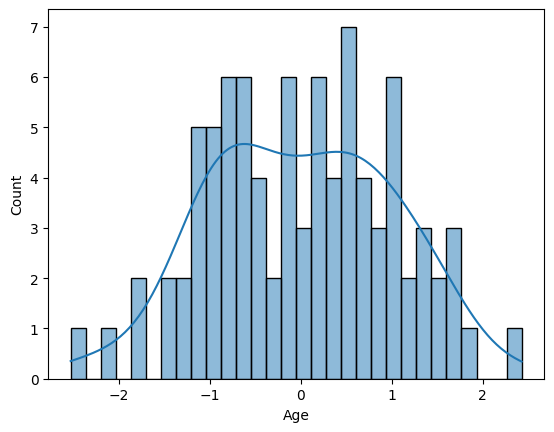

In [54]:
sns.histplot(data['Age'], bins=30, kde=True);

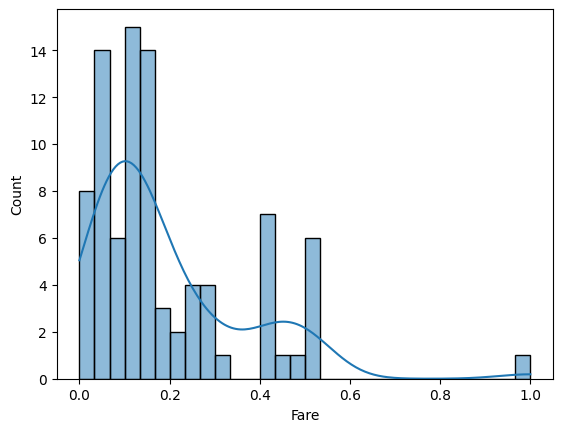

In [27]:
sns.histplot(data['Fare'], bins=30, kde=True);

In [28]:
data[numeric_features].describe()

,Age,Fare
count,87.000000,87.000000
mean,0.509962,0.191496
std,0.202916,0.172111
min,0.000000,0.000000
25%,0.346667,0.068978
50%,0.506667,0.139136
75%,0.653333,0.263633
max,1.000000,1.000000
